In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
%matplotlib inline

In [93]:
df = pd.read_csv('data/DataSet_LakasArak.csv')

In [94]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,NaN,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,NaN,NaN,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,NaN,konvection gas burner,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,NaN,"gas furnace, circulating hot water",none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179


In [95]:
def kiertekelo_fuggveny(df, tipp_oszlop_neve, target_oszlop_neve):
    mean_absolute_error=   (abs(df[tipp_oszlop_neve]-df[target_oszlop_neve])).mean()
    
    MAPE=(abs((df[target_oszlop_neve] - df[tipp_oszlop_neve])/df[target_oszlop_neve])).mean()
    rmse =  np.sqrt( ( (df[tipp_oszlop_neve]-df[target_oszlop_neve])**2 ).mean() )
    print("RMSE",rmse)
    print("MAE:",mean_absolute_error)
    print("MAPE:",MAPE)

In [96]:
df['nmAr'] = (df['price_created_at']*1000000)/df['property_area']

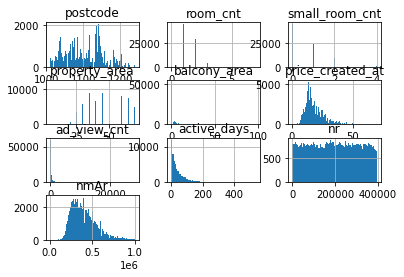

In [98]:

df2['nmAr_below1M']=df[df['nmAr']<1000000].copy()
df2['nmAr_below1M'].hist(bins=100)
plt.title('nmAr eloszlasa (max1M)')
plt.show()

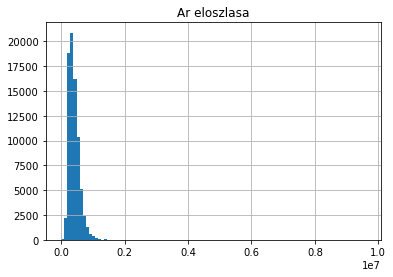

In [99]:
# negyzetmeter ar eloszlasa (100 ezres nagyságrend)
df['nmAr'].hist(bins=100)
plt.title('Ar eloszlasa')
plt.show()

In [100]:
df.shape

(78539, 23)

In [101]:
def modellezes(df, bemeno_valtozok, celvaltozo):
    train_df=df.iloc[:40000,:].copy()
    test_df =df.iloc[40000:,:].copy()
    
    model=LinearRegression()
    model.fit( train_df[bemeno_valtozok] , train_df[celvaltozo] )
    test_df['tipp']=model.predict( test_df[bemeno_valtozok] )
    return test_df, model

In [102]:
def modellezes(df, bemeno_valtozok, celvaltozo):
    X_train, X_test, y_train, y_test = train_test_split(df[bemeno_valtozok], df[celvaltozo], test_size = 0.5, random_state = 42)    
    model=LinearRegression()
    model.fit(X_train, y_train)
    X_test['tipp']=model.predict(X_test)
    X_test[celvaltozo]=y_test
    
    return X_test, model

# 1. Egyszerű modell

In [103]:
df['small_room_cnt']=df['small_room_cnt'].fillna(0)  # AHOL NINCS SEMMI KITÖLTI 0-VAL

In [104]:
bemeno_valtozok = ['room_cnt','small_room_cnt','property_area']
celvaltozo = 'nmAr'

In [105]:
test_df, model = modellezes(df, bemeno_valtozok, celvaltozo)

In [106]:
kiertekelo_fuggveny(test_df,celvaltozo,'tipp')

RMSE 171449.65068664
MAE: 122346.21377887146
MAPE: 0.3015732805586102


In [107]:
model.intercept_

519395.9283530937

In [108]:
pd.DataFrame({"att":bemeno_valtozok,"coef":model.coef_}).sort_values('coef')

,att,coef
1,small_room_cnt,-12707.568881
2,property_area,-2426.745759
0,room_cnt,8417.180983


Minél kell jobbnak lenni?

In [109]:
test_df['tipp_0']=df['nmAr'].mean()

In [111]:
test_df


,room_cnt,small_room_cnt,property_area,tipp,nmAr,tipp_0
55380,2.0,0.0,45.0,427026.731151,342222.222222,407239.631184
26864,2.0,0.0,55.0,402759.273559,323636.363636,407239.631184
43238,1.0,0.0,35.0,442877.007761,454285.714286,407239.631184
24323,1.0,1.0,30.0,442303.167677,446666.666667,407239.631184
54388,2.0,0.0,55.0,402759.273559,481818.181818,407239.631184
...,...,...,...,...,...,...
76298,2.0,0.0,55.0,402759.273559,360000.000000,407239.631184
9737,1.0,1.0,45.0,405901.981288,333333.333333,407239.631184
7609,2.0,1.0,60.0,377917.975881,298333.333333,407239.631184
62620,2.0,1.0,65.0,365784.247085,315384.615385,407239.631184


In [110]:
kiertekelo_fuggveny(test_df,'nmAr','tipp_0')

RMSE 174533.74047535344
MAE: 124466.61413255577
MAPE: 0.3056348267743914


# 2. Adatelőkészítés

Bemenő változóként használjuk a következőket:
* Szobák száma
* Félszobák száma
* Négyzetméter
* Balkon mérete  


Illetve készítsünk dummy változót az alábbi változókból
* Fűtés típusa
* Kerület neve (szóval ne a kerület sorszámát add be bemenetként)
* Lakás állapota

### Hiányzó értékek kezelése

In [19]:
# megnezzuk melyik oszlopoknal mennyi hianyzo ertek van, altalunk hasznaltak kozul csak balcony_areaban van hianyzo ertek
df.isna().sum()

county                         0
city                         559
postcode                   28954
property_type                  0
property_subtype            1659
property_condition_type        0
property_floor              3793
building_floor_count       42110
view_type                  35661
orientation                30892
garden_access              61339
heating_type               11306
elevator_type              14151
room_cnt                       0
small_room_cnt                 0
created_at                     0
property_area                  0
balcony_area                   0
price_created_at               0
ad_view_cnt                    0
active_days                    0
nr                             0
nmAr                           0
dtype: int64

In [20]:
len(df)

78539

In [21]:
df['balcony_area'].describe()

count    78539.000000
mean         1.953182
std          4.677227
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         97.000000
Name: balcony_area, dtype: float64

In [22]:
# erkely kitoltese 0-aval h nincs erkely
df['balcony_area']=df['balcony_area'].fillna(0)

In [23]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,nmAr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,361538.461538
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,444444.444444
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,366666.666667
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,200000.000000
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,170000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,...,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169,460000.000000
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,...,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174,368571.428571
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,...,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176,360000.000000
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,...,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179,437500.000000


## Kategorikus változókból dummy

In [24]:
# melyik tipusu lakasbol mennyi van
df['property_subtype'].value_counts()

brick flat (for sale)                  57081
prefabricated panel flat (for sale)    19799
Name: property_subtype, dtype: int64

#### 1. Flag változó (ha két értéket vesz fel)

In [25]:
# Nem igazan elegans ! (flag valtozo) mivel ket erteket vehet fel
df['panel_flag']=df['property_subtype'].apply(lambda x: 1 if str(x)[0]=='p' else 0) 

In [26]:
df['panel_flag'].value_counts()

0    58740
1    19799
Name: panel_flag, dtype: int64

In [27]:
#hianyzo ertekek
df['property_subtype'].isna().sum()

1659

#### 2. Számoknak megfeleltetés

In [28]:
df['city'].value_counts()

Budapest XIII.     8567
Budapest XIV.      8434
Budapest XI.       7001
Budapest VII.      6064
Budapest III.      5646
Budapest VIII.     5460
Budapest VI.       4577
Budapest IX.       3877
Budapest IV.       3376
Budapest II.       3274
Budapest XV.       3109
Budapest X.        3049
Budapest V.        2518
Budapest XII.      2140
Budapest XVIII.    1915
Budapest XXI.      1907
Budapest XIX.      1604
Budapest XX.       1595
Budapest I.        1419
Budapest XVII.      955
Budapest XVI.       769
Budapest XXII.      616
Budapest XXIII.     108
Name: city, dtype: int64

In [29]:
df['postcode'].isna().sum()

28954

In [30]:
df['ker_code']=df['postcode'].fillna(1000).apply(lambda x: int(str(x)[1:3]))

In [31]:
stat = df.groupby('city',as_index=False).agg({'ker_code':'max'})  
stat

,city,ker_code
0,Budapest I.,1
1,Budapest II.,2
2,Budapest III.,3
3,Budapest IV.,4
4,Budapest IX.,9
5,Budapest V.,5
6,Budapest VI.,6
7,Budapest VII.,7
8,Budapest VIII.,8
9,Budapest X.,19


In [32]:
# javitjuk a kerulet hibat kezzel
stat.iloc[9,1]=10
stat.iloc[12,1]=13

In [33]:
stat.columns=['city','kerulet_sorszam']

In [34]:
stat.head()

,city,kerulet_sorszam
0,Budapest I.,1
1,Budapest II.,2
2,Budapest III.,3
3,Budapest IV.,4
4,Budapest IX.,9


In [35]:
df=df.merge(stat,on='city',how='left')

In [112]:
df


,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,nmAr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,361538.461538
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,444444.444444
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,366666.666667
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,200000.000000
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,NaN,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,170000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169,460000.000000
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,NaN,NaN,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174,368571.428571
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,NaN,konvection gas burner,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176,360000.000000
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,NaN,"gas furnace, circulating hot water",none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179,437500.000000


In [37]:
df['kerulet_sorszam'].isnull().sum()

559

In [38]:
df['kerulet_sorszam']=df['kerulet_sorszam'].fillna(0)

#### Dummyzálás

In [39]:
# lessük meg, hogy mi történt (dummy oszlopok)
pd.set_option('display.max_columns', None)

In [40]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,nmAr,panel_flag,ker_code,kerulet_sorszam
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,361538.461538,0,0,12.0
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,444444.444444,0,1,1.0
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,366666.666667,0,16,16.0
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,200000.000000,0,0,10.0
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,NaN,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,170000.000000,1,18,18.0


In [41]:
# fűtés típust vegyük hozzá
df['heating_type'].value_counts()

# Binaris valtozokat hozunk letre a nominalis ertekekbol - Dummy 

df['heating_type']=df['heating_type'].fillna('other')

heating_dummies = pd.get_dummies(df['heating_type'], prefix = 'heating_type=', drop_first = True)

df = df.merge(heating_dummies, left_index = True, right_index = True, how = 'left')

In [42]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,nmAr,panel_flag,ker_code,kerulet_sorszam,heating_type=_central heating with own meter,heating_type=_district heating,heating_type=_electric,heating_type=_fan-coil,heating_type=_gas furnace,"heating_type=_gas furnace, circulating hot water",heating_type=_konvection gas burner,heating_type=_other,heating_type=_tile stove (gas)
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,361538.461538,0,0,12.0,0,0,0,0,0,0,0,0,1
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,444444.444444,0,1,1.0,0,0,0,0,0,0,1,0,0
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,366666.666667,0,16,16.0,1,0,0,0,0,0,0,0,0
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,200000.000000,0,0,10.0,0,0,0,0,0,0,0,0,0
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,other,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,170000.000000,1,18,18.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169,460000.000000,0,6,6.0,0,0,0,0,0,1,0,0,0
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,NaN,other,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174,368571.428571,1,3,3.0,0,0,0,0,0,0,0,1,0
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,NaN,konvection gas burner,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176,360000.000000,0,0,14.0,0,0,0,0,0,0,1,0,0
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,NaN,"gas furnace, circulating hot water",none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179,437500.000000,0,2,2.0,0,0,0,0,0,1,0,0,0


# 3. Modellezés

In [43]:
bemeno_valtozok=['panel_flag','balcony_area','small_room_cnt','room_cnt','property_area','kerulet_sorszam']

In [44]:
# heating dummy oszlopok hozzáadása
bemeno_valtozok = bemeno_valtozok + heating_dummies.columns.tolist()[:-1]

In [45]:
bemeno_valtozok

['panel_flag',
 'balcony_area',
 'small_room_cnt',
 'room_cnt',
 'property_area',
 'kerulet_sorszam',
 'heating_type=_central heating with own meter',
 'heating_type=_district heating',
 'heating_type=_electric',
 'heating_type=_fan-coil',
 'heating_type=_gas furnace',
 'heating_type=_gas furnace, circulating hot water',
 'heating_type=_konvection gas burner',
 'heating_type=_other']

In [46]:
test_df2, model2 = modellezes(df, bemeno_valtozok, celvaltozo)

In [47]:
kiertekelo_fuggveny(test_df2,celvaltozo,'tipp')

RMSE 146286.65511471478
MAE: 96907.06523026312
MAPE: 0.2338116065372678


In [48]:
#íme a regressziós modellünk paraméterei
pd.DataFrame({"att":bemeno_valtozok,"coef":model2.coef_}).sort_values('coef')

,att,coef
0,panel_flag,-126695.536535
12,heating_type=_konvection gas burner,-92961.806896
7,heating_type=_district heating,-45879.109768
10,heating_type=_gas furnace,-40820.159164
13,heating_type=_other,-33979.233599
8,heating_type=_electric,-26524.636293
5,kerulet_sorszam,-8976.314691
4,property_area,-3556.857617
1,balcony_area,3938.252253
11,"heating_type=_gas furnace, circulating hot water",10063.658601


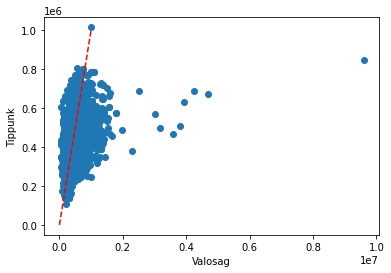

In [49]:
plt.scatter(test_df2[celvaltozo],test_df2['tipp'])
plt.xlabel("Valosag")
plt.ylabel("Tippunk")

plt.plot([0,1000000],[0,1000000],'r--')
plt.show()

# Keresztvalidáció

In [50]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [51]:
# korabban megirt MAPE fg.-t masoljuk
# hiba minel kisebb annal jobb, greater is better = False
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better = False)

In [52]:
model = LinearRegression()

In [53]:
# k-fold = 5 tehat 5 reszre osztja
scores = cross_validate(model, df[bemeno_valtozok], df[celvaltozo], cv = 5, scoring = mape_scorer)

In [54]:
scores

{'fit_time': array([0.0411272 , 0.06802249, 0.06799769, 0.07417154, 0.0559957 ]),
 'score_time': array([0.01207495, 0.01322079, 0.01292205, 0.01683474, 0.01128531]),
 'test_score': array([-0.38374096, -0.28395675, -0.24883929, -0.21819858, -0.21585144])}

In [55]:
# atlagosan 20 %-os hiba
np.mean(scores['test_score'])

-0.2701174033291168

# Modellezés 2.0 kerület, mint dummy


In [56]:
# fűtés típust vegyük hozzá
df['kerulet_sorszam'].value_counts()

# Binaris valtozokat hozunk letre a nominalis ertekekbol - Dummy 

df['kerulet_sorszam']=df['kerulet_sorszam'].fillna('0')

district_dummies = pd.get_dummies(df['kerulet_sorszam'], prefix = 'kerulet_sorszam=', drop_first = True)

df = df.merge(district_dummies, left_index = True, right_index = True, how = 'left')

In [57]:
df['kerulet_sorszam'].value_counts()


13.0    8567
14.0    8434
11.0    7001
7.0     6064
3.0     5646
8.0     5460
6.0     4577
9.0     3877
4.0     3376
2.0     3274
15.0    3109
10.0    3049
5.0     2518
12.0    2140
18.0    1915
21.0    1907
19.0    1604
20.0    1595
1.0     1419
17.0     955
16.0     769
22.0     616
0.0      559
23.0     108
Name: kerulet_sorszam, dtype: int64

In [58]:
bemeno_valtozok=['panel_flag','balcony_area','small_room_cnt','room_cnt','property_area','kerulet_sorszam']

In [59]:
bemeno_valtozok = bemeno_valtozok + district_dummies.columns.tolist()[:-1] + heating_dummies.columns.tolist()

In [60]:
test_df3, model3 = modellezes(df, bemeno_valtozok, celvaltozo)

In [61]:
kiertekelo_fuggveny(test_df3,celvaltozo,'tipp')

RMSE 126048.06327020333
MAE: 77580.4829858959
MAPE: 0.18742171932497217


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
model_dt = DecisionTreeRegressor(max_depth = 5, random_state=42)   #random state if tme model can't make a decision

In [64]:
model_forest = RandomForestRegressor(random_state=42, max_depth=5,n_estimators=100)

In [65]:
model_gbm = GradientBoostingRegressor(random_state=42,max_depth=5,n_estimators=100)

In [66]:
def modellezes2(model,df, bemeno_valtozok, celvaltozo):
    X_train, X_test, y_train, y_test = train_test_split(df[bemeno_valtozok], df[celvaltozo], test_size = 0.5, random_state = 42)    
    
    model.fit(X_train, y_train)
    X_test['tipp']=model.predict(X_test)
    X_test[celvaltozo]=y_test
    
    return X_test

In [67]:
for m in [model_dt,model_forest,model_gbm]:
    test_df = modellezes2(m,df,bemeno_valtozok,celvaltozo)
    print(str(m)[:20])
    kiertekelo_fuggveny(test_df,'tipp',celvaltozo)

DecisionTreeRegresso
RMSE 140622.6083151623
MAE: 89453.02439553695
MAPE: 0.23481483821831464
RandomForestRegresso
RMSE 136917.88864848597
MAE: 87309.13101518032
MAPE: 0.22847378698191556
GradientBoostingRegr
RMSE 120733.0632029921
MAE: 72079.93282332698
MAPE: 0.183014085284408


In [68]:
#íme a regressziós modellünk paraméterei
pd.DataFrame({"att":bemeno_valtozok,"coef":model3.coef_}).sort_values('coef')

,att,coef
0,panel_flag,-86643.841657
34,heating_type=_konvection gas burner,-83136.961713
36,heating_type=_tile stove (gas),-77398.353561
32,heating_type=_gas furnace,-42918.468231
30,heating_type=_electric,-37501.189004
15,kerulet_sorszam=_10.0,-35138.633599
35,heating_type=_other,-29554.074099
29,heating_type=_district heating,-28298.312675
9,kerulet_sorszam=_4.0,-27303.694257
25,kerulet_sorszam=_20.0,-12698.784017


# kerulet - keruleti atlagar

In [69]:
bemeno_valtozok = bemeno_valtozok[:5] + bemeno_valtozok[28:]

In [70]:
bemeno_valtozok

['panel_flag',
 'balcony_area',
 'small_room_cnt',
 'room_cnt',
 'property_area',
 'heating_type=_central heating with own meter',
 'heating_type=_district heating',
 'heating_type=_electric',
 'heating_type=_fan-coil',
 'heating_type=_gas furnace',
 'heating_type=_gas furnace, circulating hot water',
 'heating_type=_konvection gas burner',
 'heating_type=_other',
 'heating_type=_tile stove (gas)']

In [71]:
df['city'] = df['city'].fillna("Kerulet 0.")

In [72]:
train_df, test_df = train_test_split(df, test_size=0.5,random_state=42)

In [73]:
stat = train_df.groupby("city", as_index=False).agg({celvaltozo:'mean'})

In [74]:
stat.columns=['city','atlag_nmAr']

In [75]:
df = df.merge(stat,on='city',how='left')

In [76]:
bemeno_valtozok.append("atlag_nmAr")

In [77]:
bemeno_valtozok

['panel_flag',
 'balcony_area',
 'small_room_cnt',
 'room_cnt',
 'property_area',
 'heating_type=_central heating with own meter',
 'heating_type=_district heating',
 'heating_type=_electric',
 'heating_type=_fan-coil',
 'heating_type=_gas furnace',
 'heating_type=_gas furnace, circulating hot water',
 'heating_type=_konvection gas burner',
 'heating_type=_other',
 'heating_type=_tile stove (gas)',
 'atlag_nmAr']

In [78]:
model_linreg = LinearRegression()

In [79]:
for m in [model_dt,model_forest,model_gbm,model_linreg]:
    test_df = modellezes2(m,df,bemeno_valtozok,celvaltozo)
    print(str(m)[:20])
    kiertekelo_fuggveny(test_df,'tipp',celvaltozo)

DecisionTreeRegresso
RMSE 135005.94949520595
MAE: 82431.6539551091
MAPE: 0.21172077442110557
RandomForestRegresso
RMSE 129151.88251747067
MAE: 80606.57026688215
MAPE: 0.20789474863063886
GradientBoostingRegr
RMSE 116277.25634857052
MAE: 71562.65522987362
MAPE: 0.1818125912993226
LinearRegression()
RMSE 126632.69784756374
MAE: 78394.32719894363
MAPE: 0.20185682738060734


In [80]:
bemeno_valtozok = bemeno_valtozok[:14]
df['city'] = df['city'].fillna("Kerulet 0.")
#train_df, test_df = train_test_split(df, test_size=0.5,random_state=42)
stat = train_df.groupby("city", as_index=False).agg({celvaltozo:['sum','count','mean']})

stat.columns=['city','kerulet_sum','kerulet_db','kerulet_atlag']
df = df.merge(stat,on='city',how='left')

In [ ]:
# tudnunk kell melyik kerül a train és testbe

In [81]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,nmAr,panel_flag,ker_code,kerulet_sorszam,heating_type=_central heating with own meter,heating_type=_district heating,heating_type=_electric,heating_type=_fan-coil,heating_type=_gas furnace,"heating_type=_gas furnace, circulating hot water",heating_type=_konvection gas burner,heating_type=_other,heating_type=_tile stove (gas),kerulet_sorszam=_1.0,kerulet_sorszam=_2.0,kerulet_sorszam=_3.0,kerulet_sorszam=_4.0,kerulet_sorszam=_5.0,kerulet_sorszam=_6.0,kerulet_sorszam=_7.0,kerulet_sorszam=_8.0,kerulet_sorszam=_9.0,kerulet_sorszam=_10.0,kerulet_sorszam=_11.0,kerulet_sorszam=_12.0,kerulet_sorszam=_13.0,kerulet_sorszam=_14.0,kerulet_sorszam=_15.0,kerulet_sorszam=_16.0,kerulet_sorszam=_17.0,kerulet_sorszam=_18.0,kerulet_sorszam=_19.0,kerulet_sorszam=_20.0,kerulet_sorszam=_21.0,kerulet_sorszam=_22.0,kerulet_sorszam=_23.0,atlag_nmAr,kerulet_sum,kerulet_db,kerulet_atlag
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,361538.461538,0,0,12.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,511893.088631,5.569397e+08,1088,511893.088631
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,444444.444444,0,1,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,567816.221212,3.986070e+08,702,567816.221212
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,366666.666667,0,16,16.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,346937.667022,1.290608e+08,372,346937.667022
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,200000.000000,0,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,272061.026411,4.124445e+08,1516,272061.026411
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,other,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,170000.000000,1,18,18.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,284178.795429,2.799161e+08,985,284178.795429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169,460000.000000,0,6,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,528447.458687,1.233396e+09,2334,528447.458687
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,NaN,other,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174,368571.428571,1,3,3.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,373274.537385,1.068312e+09,2862,373274.537385
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,NaN,konvection gas burner,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176,360000.000000,0,0,14.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,372609.965422,1.555274e+09,4174,372609.965422
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,NaN,"gas furnace, circulating hot water",none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179,437500.000000,0,2,2.0,0

In [87]:
train_df, test_df = train_test_split(df, test_size=0.5,random_state=42)
test_df['keruleti_okos_atlag'] = test_df['kerulet_atlag']

train_df['keruleti_okos_atlag'] = (train_df['kerulet_sum']-train_df['nmAr'])/train_df['kerulet_db']

In [90]:
def modellezes3(model,train_df,test_df, bemeno_valtozok, celvaltozo):
    model.fit(train_df[bemeno_valtozok], train_df[celvaltozo])
    test_df['tipp']=model.predict(test_df[bemeno_valtozok])
   
    
    return test_df

In [91]:
for m in [model_dt,model_forest,model_gbm,model_linreg]:
    test_df = modellezes3(m,train_df,test_df,bemeno_valtozok,celvaltozo)
    print("\n",str(m)[:20])
    kiertekelo_fuggveny(test_df,'tipp',celvaltozo)


 DecisionTreeRegresso
RMSE 152039.52005947146
MAE: 100802.58810406912
MAPE: 0.2699943145838329

 RandomForestRegresso
RMSE 151312.5077348378
MAE: 100575.11343444727
MAPE: 0.2696076010578589

 GradientBoostingRegr
RMSE 146641.51601383032
MAE: 97520.72656721859
MAPE: 0.26045931969620856

 LinearRegression()
RMSE 152466.9986990969
MAE: 101108.54000774203
MAPE: 0.27094834906644855
